# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt





Load in the "states_edu.csv" dataset and take a look at the head of the data

In [11]:
# Load dataset
df = pd.read_csv('/Users/oliverzhao/Desktop/MDST-Onboarding-main/data/states_edu.csv')

# Check the first few rows
print(df.head())

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 4 Math*

How many years of data are logged in our dataset? 

In [13]:
years_logged = df['YEAR'].nunique()
print(f"Number of years logged: {years_logged}")


Number of years logged: 33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [16]:
# Drop rows where AVG_MATH_4_SCORE is NaN
df_cleaned = df.dropna(subset=['AVG_MATH_4_SCORE'])

# Filter data for Michigan and Ohio
mi_oh_data = df_cleaned[df_cleaned['STATE'].isin(['MICHIGAN', 'OHIO'])]

# Calculate the average for Michigan and Ohio
mi_avg = mi_oh_data[mi_oh_data['STATE'] == 'MICHIGAN']['AVG_MATH_4_SCORE'].mean()
oh_avg = mi_oh_data[mi_oh_data['STATE'] == 'OHIO']['AVG_MATH_4_SCORE'].mean()

# Print the results
print(f"Michigan average: {mi_avg}, Ohio average: {oh_avg}")

# Determine which state has the higher average
if mi_avg > oh_avg:
    print("Michigan has the higher average across all years.")
else:
    print("Ohio has the higher average across all years.")


Michigan average: 234.36363636363637, Ohio average: 239.45454545454547
Ohio has the higher average across all years.


Find the average for your chosen test across all states in 2019

In [18]:
# Filter data for the year 2019
data_2019 = df_cleaned[df_cleaned['YEAR'] == 2019]

# Calculate the average of AVG_MATH_4_SCORE across all states in 2019
avg_2019 = data_2019['AVG_MATH_4_SCORE'].mean()

# Print the result
print(f"Average Grade 4 Math score across all states in 2019: {avg_2019}")


Average Grade 4 Math score across all states in 2019: 239.9433962264151


For each state, find a maximum value for your chosen test score

In [20]:
# Group by state and find the maximum AVG_MATH_4_SCORE for each state
state_max_scores = df_cleaned.groupby('STATE')['AVG_MATH_4_SCORE'].max()

# Print the result
print(state_max_scores)


STATE
ALABAMA                 233.0
ALASKA                  237.0
ARIZONA                 240.0
ARKANSAS                240.0
CALIFORNIA              235.0
COLORADO                247.0
CONNECTICUT             245.0
DELAWARE                243.0
DISTRICT_OF_COLUMBIA    235.0
DODEA                   250.0
FLORIDA                 246.0
GEORGIA                 240.0
HAWAII                  243.0
IDAHO                   242.0
ILLINOIS                239.0
INDIANA                 249.0
IOWA                    246.0
KANSAS                  248.0
KENTUCKY                242.0
LOUISIANA               234.0
MAINE                   246.0
MARYLAND                247.0
MASSACHUSETTS           253.0
MICHIGAN                238.0
MINNESOTA               253.0
MISSISSIPPI             241.0
MISSOURI                241.0
MONTANA                 244.0
NATIONAL                242.0
NEBRASKA                246.0
NEVADA                  237.0
NEW_HAMPSHIRE           253.0
NEW_JERSEY              249.0
NEW_

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [32]:
# Drop rows with NaN in the specified columns
df_cleaned = df_cleaned.dropna(subset=['TOTAL_EXPENDITURE', 'ENROLL', 'TOTAL_REVENUE', 'INSTRUCTION_EXPENDITURE'])

# Creating new feature: Expenditure per student
df_cleaned['Expenditure_per_Student'] = df_cleaned['TOTAL_EXPENDITURE'] / df_cleaned['ENROLL']

# Creating new feature: Revenue per student
df_cleaned['Revenue_per_Student'] = df_cleaned['TOTAL_REVENUE'] / df_cleaned['ENROLL']

# Creating new feature: Instruction expenditure per student
df_cleaned['Instruction_Expenditure_per_Student'] = df_cleaned['INSTRUCTION_EXPENDITURE'] / df_cleaned['ENROLL']

# Display the new features
print(df_cleaned[['Expenditure_per_Student', 'Revenue_per_Student', 'Instruction_Expenditure_per_Student']].head())


     Expenditure_per_Student  Revenue_per_Student  \
408                 6.852063             6.691350   
410                 6.623893             6.724498   
411                 5.953176             6.311367   
412                 7.712920             7.847296   
414                10.568761            11.094435   

     Instruction_Expenditure_per_Student  
408                             3.494616  
410                             3.054628  
411                             3.397068  
412                             3.957355  
414                             6.013095  


Feature engineering justification: 

Expenditure per Student: Total expenditure divided by the number of enrolled students could give an indication of how much is being invested in each student, which may affect their academic performance.

Revenue per Student: Total revenue collected per student could impact the quality of educational facilities and resources, indirectly affecting test scores.

Instruction Expenditure per Student: Directly related to the quality of teaching, this feature could be strongly linked to student performance as better instruction typically leads to better academic outcomes.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

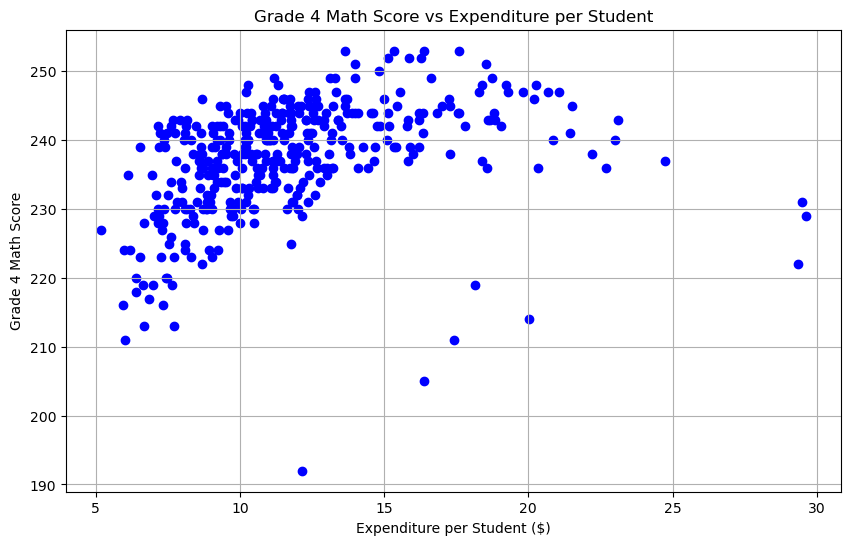

In [34]:
# Visualization 1: AVG_MATH_4_SCORE vs Expenditure_per_Student
plt.figure(figsize=(10,6))
plt.scatter(df_cleaned['Expenditure_per_Student'], df_cleaned['AVG_MATH_4_SCORE'], color='blue')
plt.title('Grade 4 Math Score vs Expenditure per Student')
plt.xlabel('Expenditure per Student ($)')
plt.ylabel('Grade 4 Math Score')
plt.grid(True)
plt.show()


General Trend: There appears to be a positive relationship between expenditure per student and Grade 4 Math scores up to a certain point (approximately $15-$20 per student), where higher spending correlates with better scores.

Diminishing Returns: Beyond $20 per student, the relationship seems to plateau or even show a slight decrease in performance. This might indicate diminishing returns where additional spending doesn't necessarily lead to better outcomes.

Outliers: There are a few data points below $20 per student with much lower scores, around the 190-210 range, indicating that some states may perform poorly despite higher spending.

Clustered Data: The majority of the data points fall between 220 and 250 in math scores, with spending ranging from $5 to $15 per student.

**Visualization 2**

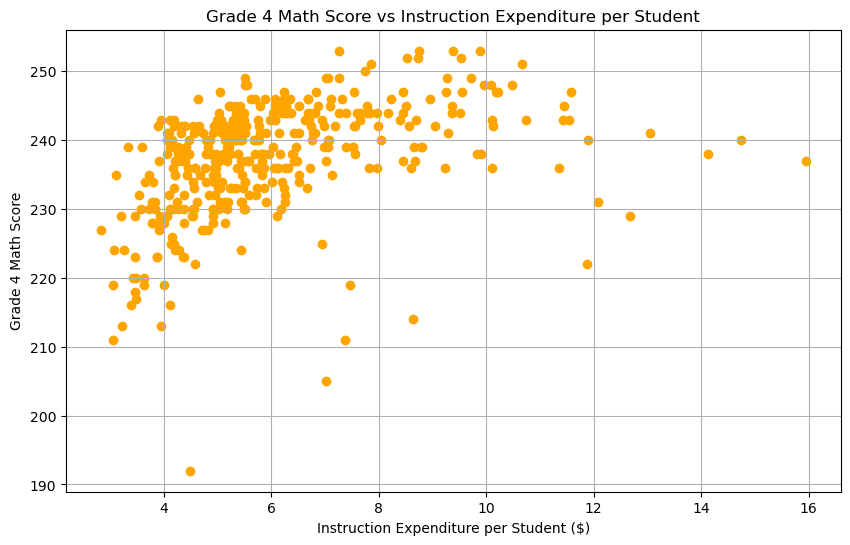

In [36]:
# Visualization 2: AVG_MATH_4_SCORE vs Instruction Expenditure per Student
plt.figure(figsize=(10,6))
plt.scatter(df_cleaned['Instruction_Expenditure_per_Student'], df_cleaned['AVG_MATH_4_SCORE'], color='orange')
plt.title('Grade 4 Math Score vs Instruction Expenditure per Student')
plt.xlabel('Instruction Expenditure per Student ($)')
plt.ylabel('Grade 4 Math Score')
plt.grid(True)
plt.show()


Positive Correlation: There is a general positive correlation between instruction expenditure per student and Grade 4 Math scores, meaning that states spending more on instruction per student tend to have higher math scores.

Plateau Effect: The scores seem to plateau after about $6 per student. Beyond this point, increasing instruction expenditure doesn't appear to result in significantly higher scores for most states. This suggests that there might be diminishing returns on investment in instruction expenditure.

Outliers: There are some outliers, particularly for states that spend more than 10 per student but still have scores around the 220-230 range. Additionally, some states spending less than 5 also achieve relatively high scores (above 240).

In [46]:
# Conclusion: Expenditure per Student and Instruction Expenditure per Student are both positively correlated with academic performance
# But instructional spending shows a tighter relationship.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [48]:
from sklearn.model_selection import train_test_split

In [50]:
# Define X (predictor) and y (response variable)
X = df_cleaned[['Instruction_Expenditure_per_Student']]  # Use only Instruction Expenditure per Student
y = df_cleaned['AVG_MATH_4_SCORE']  # Use Grade 4 Math Score as the response variable

# Create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (318, 1)
X_test shape: (80, 1)
y_train shape: (318,)
y_test shape: (80,)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Create a pipeline that first creates polynomial features then applies linear regression
degree = 2  # Try using polynomial of degree 2
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the polynomial model on the training data
poly_model.fit(X_train, y_train)

# Predict on the test data
y_pred_poly = poly_model.predict(X_test)

# Evaluate the polynomial regression model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Regression (degree {degree}) MSE: {mse_poly}")
print(f"Polynomial Regression (degree {degree}) R-squared: {r2_poly}")


Polynomial Regression (degree 2) MSE: 55.658692412404775
Polynomial Regression (degree 2) R-squared: 0.3295837250710182


In [58]:
# Set the degree to 3
degree = 3

# Create a pipeline for polynomial regression with degree 3
poly_model_degree_3 = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fit the model to the training data
poly_model_degree_3.fit(X_train, y_train)

# Predict on the test data
y_pred_poly_3 = poly_model_degree_3.predict(X_test)

# Evaluate the model
mse_poly_3 = mean_squared_error(y_test, y_pred_poly_3)
r2_poly_3 = r2_score(y_test, y_pred_poly_3)

print(f"Polynomial Regression (degree {degree}) MSE: {mse_poly_3}")
print(f"Polynomial Regression (degree {degree}) R-squared: {r2_poly_3}")


Polynomial Regression (degree 3) MSE: 53.850101100564096
Polynomial Regression (degree 3) R-squared: 0.35136844543722845


## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [60]:
# I chose Mean Squared Error (MSE) and R-squared (R²) to evaluate the model's performance. 

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

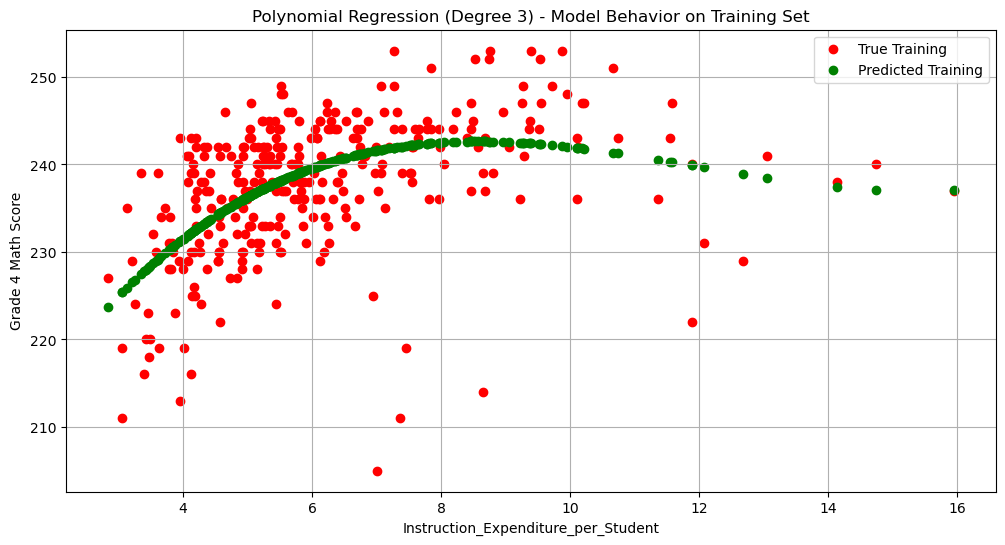

In [62]:
col_name = 'Instruction_Expenditure_per_Student'

# Visualize model behavior on training set
f = plt.figure(figsize=(12, 6))
plt.scatter(X_train[col_name], y_train, color='red', label='True Training')
plt.scatter(X_train[col_name], poly_model_degree_3.predict(X_train), color='green', label='Predicted Training')

plt.legend()
plt.xlabel(col_name)
plt.ylabel('Grade 4 Math Score')
plt.title("Polynomial Regression (Degree 3) - Model Behavior on Training Set")
plt.grid(True)
plt.show()


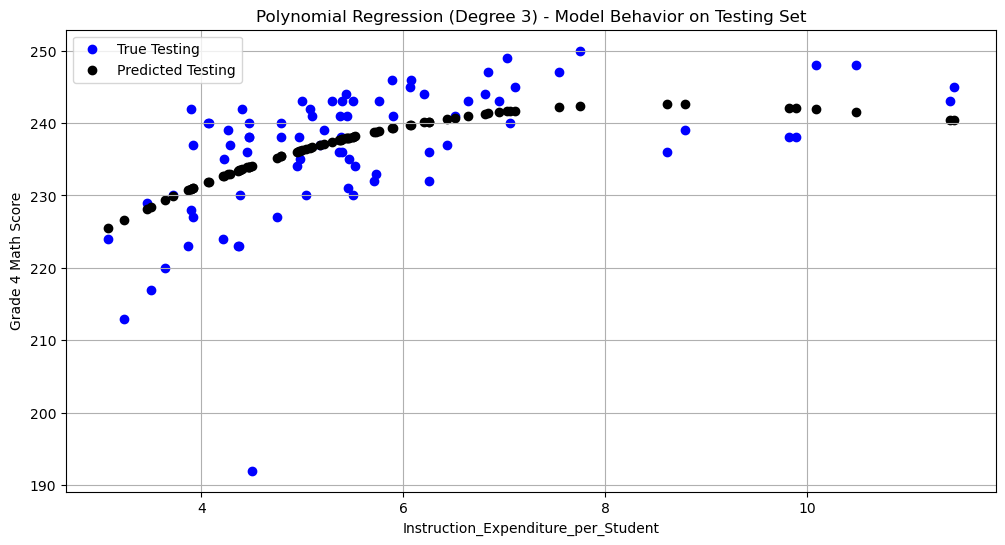

In [64]:
# Visualize model behavior on testing set
f = plt.figure(figsize=(12, 6))
plt.scatter(X_test[col_name], y_test, color='blue', label='True Testing')
plt.scatter(X_test[col_name], poly_model_degree_3.predict(X_test), color='black', label='Predicted Testing')

plt.legend()
plt.xlabel(col_name)
plt.ylabel('Grade 4 Math Score')
plt.title("Polynomial Regression (Degree 3) - Model Behavior on Testing Set")
plt.grid(True)
plt.show()


In [ ]:
# Summary of Observations:

# 1. The model captures the general trend and diminishing returns of instructional expenditure effectively, especially around $4 to $8 per student.
# 2. It fits well in the central range of expenditure but underpredicts scores at both low (<$4) and high (>$8) expenditure levels.
# 3. The true scores show high variance at the extremes, suggesting additional factors might influence the outcomes that the model doesn't account for.

# Conclusion:
# The degree 3 polynomial model performs well in the middle range of spending but struggles with outliers. It effectively captures diminishing returns, though other factors beyond expenditure likely affect performance.